# Geospatial Analysis

## Visualize restaurant locations on a map

In [10]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import pandas as pd
df = pd.read_csv('Dataset .csv')
import folium 

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)


for idx, row in df.iterrows():
               folium.CircleMarker(location=[row['Latitude'],
                                   row['Longitude']],
                                   radius=2,
                                   color='blue',
                                   fill=True,
                                   fill_opacity=0.5
                                  ).add_to(m)

m

## Analyze distribution across cities and countries

### Number of restaurants per city (top 10)

In [12]:
city_counts = df['City'].value_counts().head(10)
print("\nTop 10 cities by number of restaurants:")
display(city_counts)


Top 10 cities by number of restaurants:


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

### Plot (bar chart): Top cities

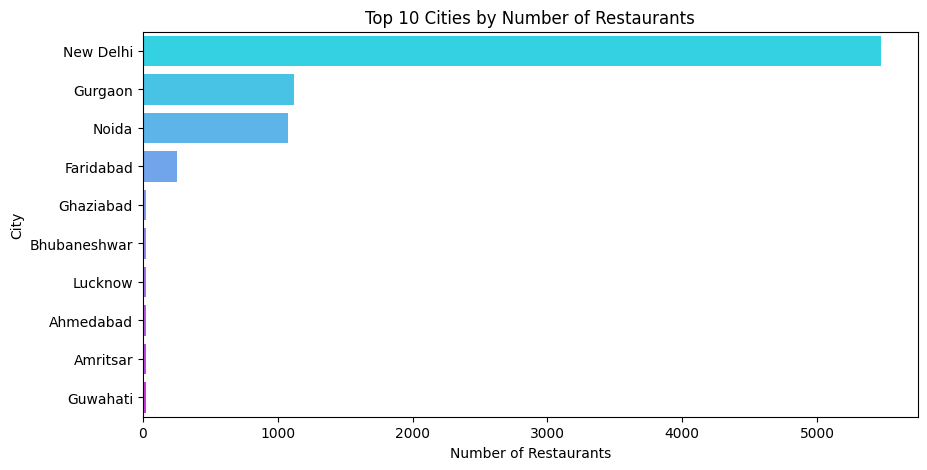

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.values, y=city_counts.index, hue=city_counts.index, palette='cool', legend=False)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

### Number of restaurants per country

In [14]:
country_counts = df['Country Code'].value_counts()
print("\nNumber of restaurants per country:")
display(country_counts)


Number of restaurants per country:


Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

###  Plot (bar chart):Top countries (top 10 for visualization)

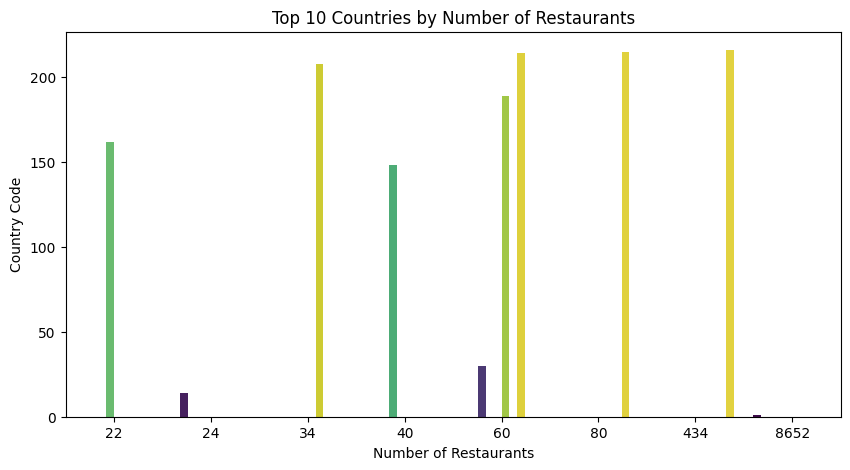

In [15]:
plt.figure(figsize=(10,5))
top_countries = country_counts.head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue = top_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Countries by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

## Correlation between location & rating

In [21]:
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation matrix:")
display(correlation)


Correlation matrix:


Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000

### Latitude vs Aggregate rating

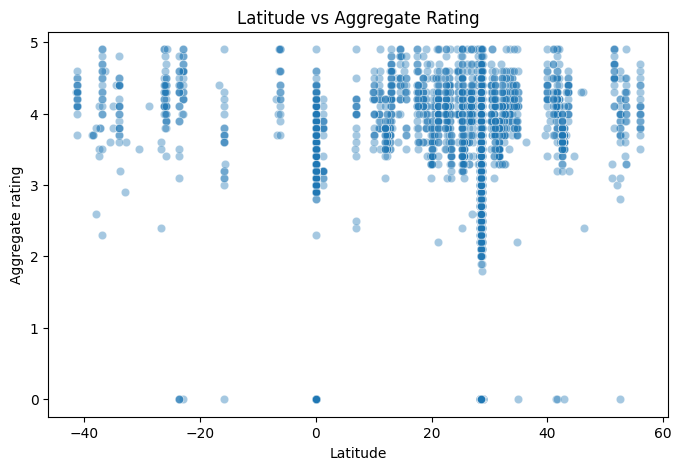

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Latitude', y='Aggregate rating', data=df, alpha=0.4)
plt.title('Latitude vs Aggregate Rating')
plt.show()

### Longitude vs Aggregate rating

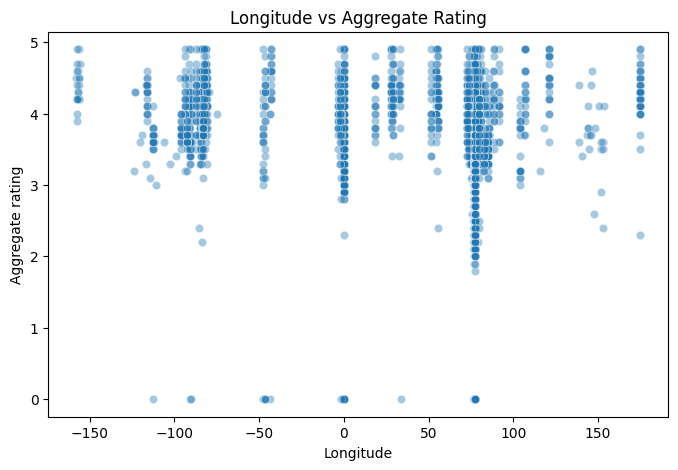

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Longitude', y='Aggregate rating', data=df, alpha=0.4)
plt.title('Longitude vs Aggregate Rating')
plt.show()